In [4]:
import pandas as pd

train = pd.read_csv('train.csv')
train.head()

,id,label,statement,subject,speaker,speaker_job,state_info,party_affiliation
0,81f884c64a7,1,China is in the South China Sea and (building)...,"china,foreign-policy,military",donald-trump,President-Elect,New York,republican
1,30c2723a188,0,With the resources it takes to execute just ov...,health-care,chris-dodd,U.S. senator,Connecticut,democrat
2,6936b216e5d,0,The (Wisconsin) governor has proposed tax give...,"corporations,pundits,taxes,abc-news-week",donna-brazile,Political commentator,"Washington, D.C.",democrat
3,b5cd9195738,1,Says her representation of an ex-boyfriend who...,"candidates-biography,children,ethics,families,...",rebecca-bradley,NaN,NaN,none
4,84f8dac7737,0,At protests in Wisconsin against proposed coll...,"health-care,labor,state-budget",republican-party-wisconsin,NaN,Wisconsin,republican


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 8950 non-null   object
 1   label              8950 non-null   int64 
 2   statement          8950 non-null   object
 3   subject            8950 non-null   object
 4   speaker            8950 non-null   object
 5   speaker_job        6469 non-null   object
 6   state_info         7021 non-null   object
 7   party_affiliation  8950 non-null   object
dtypes: int64(1), object(7)
memory usage: 559.5+ KB


## Label
Dataset ligeramente desbalanceado

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# check the number of 1s and 0s
count = train['label'].value_counts()

print('Fake "1" :', count[1])
print('Not Fake "0":', count[0])

# print the percentage of question where target == 0
print(f'Not fake: {count[0]/(count[0] +count[1])* 100}%')

Fake "1" : 5795
Not Fake "0": 3155
Not fake: 35.25139664804469%


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


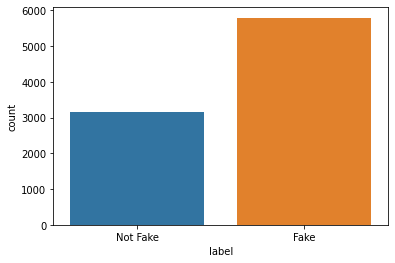

In [14]:
# plot the no of 1's and 0's
g = sns.countplot(train.label)
g.set_xticklabels(['Not Fake', 'Fake'])
plt.show()

Debemos tener especial cuidado con el clasificador que construyamos, ya que al estar basado en un dataset desbalanceado tenderá a clasificar las noticias como fake.

## Statement

In [17]:
import re
def word_tokenize(s):
    return len(re.findall('\w+', s))

In [18]:
nwords = train.statement.apply(word_tokenize)

<AxesSubplot:>

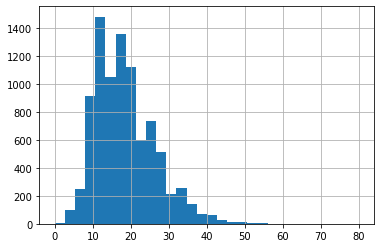

In [22]:
nwords.hist(bins=30, range=(0,80))

In [23]:
nwords.describe()

count    8950.000000
mean       18.428939
std        10.327882
min         2.000000
25%        13.000000
50%        17.000000
75%        23.000000
max       539.000000
Name: statement, dtype: float64

In [27]:
nwords.sort_values()[-10:]

7163     58
7252     58
6459     60
6235     60
4094     62
8413     63
4049     65
913      73
5443    360
3671    539
Name: statement, dtype: int64

In [32]:
nwords[nwords<30].count()/nwords.count()

0.9086033519553073

Vemos que los textos tienen de media 18 palabras, estando la mayoría de ellos (90%) por debajo de las 30 palabras. Observamos además que hay dos textos mucho más grandes que el resto.

## Subject

¿Cuáles son los temás más tratados?

In [79]:
from collections import Counter
def get_topics(x):
    return x.split(',')
topics = train.subject.apply(get_topics).to_list()
topics = [item for sublist in topics for item in sublist]

Número de topics por documento

In [89]:
train.subject.apply(get_topics).apply(len).describe()

count    8950.000000
mean        2.153631
std         1.352407
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        20.000000
Name: subject, dtype: float64

<AxesSubplot:>

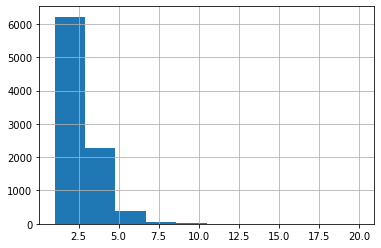

In [88]:
train.subject.apply(get_topics).apply(len).hist()

In [80]:
topics = Counter(topics)
topics

Counter({'china': 42,
         'foreign-policy': 410,
         'military': 266,
         'health-care': 991,
         'corporations': 116,
         'pundits': 183,
         'taxes': 857,
         'abc-news-week': 89,
         'candidates-biography': 572,
         'children': 168,
         'ethics': 140,
         'families': 98,
         'legal-issues': 304,
         'labor': 155,
         'state-budget': 612,
         'states': 194,
         'iraq': 116,
         'immigration': 456,
         'economy': 997,
         'income': 150,
         'retirement': 68,
         'social-security': 113,
         'wealth': 43,
         'county-budget': 53,
         'crime': 384,
         'criminal-justice': 223,
         'job-accomplishments': 261,
         'public-safety': 123,
         'sotomayor-nomination': 9,
         'supreme-court': 75,
         'medicare': 161,
         'new-hampshire-2012': 48,
         'workers': 247,
         'education': 638,
         'state-finances': 215,
         'corr

Hay un total de 142 topics

In [81]:
len(topics.keys())

142

In [133]:
n = 50
top_topics = topics.most_common(n)
top_keys = [key for key,count in top_topics]
top_values = [count for key,count in top_topics]
print(top_topics)

[('economy', 997), ('health-care', 991), ('taxes', 857), ('federal-budget', 646), ('education', 638), ('jobs', 632), ('state-budget', 612), ('candidates-biography', 572), ('elections', 536), ('immigration', 456), ('foreign-policy', 410), ('crime', 384), ('history', 352), ('energy', 328), ('legal-issues', 304), ('environment', 299), ('guns', 283), ('military', 266), ('job-accomplishments', 261), ('workers', 247), ('terrorism', 246), ('abortion', 230), ('message-machine-2012', 228), ('transportation', 228), ('criminal-justice', 223), ('state-finances', 215), ('states', 194), ('public-health', 190), ('deficit', 186), ('pundits', 183), ('congress', 180), ('women', 177), ('message-machine', 171), ('corrections-and-updates', 170), ('children', 168), ('campaign-finance', 165), ('voting-record', 162), ('medicare', 161), ('stimulus', 158), ('labor', 155), ('income', 150), ('poverty', 150), ('government-regulation', 147), ('ethics', 140), ('religion', 133), ('public-safety', 123), ('polls', 119)

<BarContainer object of 50 artists>

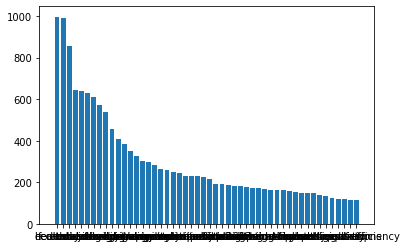

In [134]:
import matplotlib.pyplot as plt
plt.bar(top_keys,top_values)


¿Cuántos documentos tienen el top n topcis?

In [135]:
def get_top_topics(x):
    topics = set(x.split(','))
    return set(top_keys).intersection(topics)

In [136]:
train['top_topics'] = train.subject.apply(get_top_topics)

In [137]:
no_topic = train.top_topics.value_counts()
no_topic

TypeError: unhashable type: 'set'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'set'


{}                                                             653
{health-care}                                                  411
{taxes}                                                        304
{elections}                                                    272
{immigration}                                                  249
                                                              ... 
{message-machine, voting-record}                                 1
{jobs, women, workers, economy}                                  1
{congress, campaign-finance}                                     1
{corporations, pundits, energy}                                  1
{poverty, federal-budget, taxes, education, children, jobs}      1
Name: top_topics, Length: 1826, dtype: int64

In [138]:
no_topic[0]/len(train)

0.0729608938547486

Con el top 50 topics cubrimos más del 90% de los documentos en nuestro dataset.

## Topic modeling

Now we will model the topics present in the dataset using [BERTopic](https://github.com/MaartenGr/BERTopic). BERTopic is a topic modeling technique that leverages 🤗 transformers and c-TF-IDF to create dense clusters allowing for easily interpretable topics whilst keeping important words in the topic descriptions. It even supports visualizations similar to LDAvis!

We will follow the [example notebook](https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing#scrollTo=wf31gQavdtfG).

In [184]:
from bertopic import BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True,verbose=True)

In [185]:
topics, probs = topic_model.fit_transform(train.statement)

2021-05-11 14:18:11,331 - BERTopic - Transformed documents to Embeddings


2021-05-11 14:18:39,243 - BERTopic - Reduced dimensionality with UMAP
2021-05-11 14:18:52,620 - BERTopic - Clustered UMAP embeddings with HDBSCAN


También podemos reducir el número de temas después de haber entrenado un modelo BERTopic. La ventaja de hacerlo es que se puede decidir el número de temas después de saber cuántos se crean realmente. Es difícil predecir antes de entrenar el modelo cuántos temas hay en los documentos y cuántos se extraerán. En cambio, podemos decidir después cuántos temas parece realista. De nuestro análisis de la columna SUbject anterior, hemos dedicido reducir a n = 50 topics.

In [186]:
topics, probs = topic_model.reduce_topics(train.statement, topics, probs, nr_topics=n)

2021-05-11 14:19:22,900 - BERTopic - Reduced number of topics from 119 to 51


También podemos utilizar un rango de n_gramas diferente. Podemos utilizar la función update_topics para actualizar la representación de temas con nuevos parámetros para c-TF-IDF:

In [187]:
topic_model.update_topics(train.statement, topics, n_gram_range=(1, 2))

In [188]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,5018,-1_says_have_of the_has
1,5,395,5_wisconsin_milwaukee_in wisconsin_gov scott
2,86,231,86_lowest_the lowest_lower_less
3,6,220,6_oil_gas_oil and_the oil
4,47,155,47_texas_austin_of texas_in texas
5,33,152,33_50_500_500 billion_50 percent
6,74,147,74_trump_donald trump_trumps_donald trumps
7,85,119,85_insurance_abortion_reform_care reform
8,14,114,14_florida_in florida_florida is_floridas
9,71,110,71_health_insurance_health insurance_obamacare


In [189]:
freq = topic_model.get_topic_info(); freq.head(5)

,Topic,Count,Name
0,-1,5018,-1_says_have_of the_has
1,5,395,5_wisconsin_milwaukee_in wisconsin_gov scott
2,86,231,86_lowest_the lowest_lower_less
3,6,220,6_oil_gas_oil and_the oil
4,47,155,47_texas_austin_of texas_in texas


In [190]:
topic_nr = freq.iloc[1]["Topic"]  # We select a frequent topic
topic_model.get_topic(topic_nr)   # You can select a topic number as shown above

[('wisconsin', 0.04506506194954552),
 ('milwaukee', 0.018354272725084175),
 ('in wisconsin', 0.01250628003230682),
 ('gov scott', 0.012017116097761476),
 ('wisconsins', 0.01144006649472136),
 ('milwaukee county', 0.010226926450297935),
 ('the wisconsin', 0.008396907564440146),
 ('says wisconsin', 0.006314935387769691),
 ('of wisconsin', 0.006314935387769691),
 ('wisconsin gov', 0.005920251926034086)]

In [192]:
topic_model.visualize_topics()

In [193]:
topic_model.visualize_distribution(probs[2], min_probability=0.015) #to understand how confident BERTopic is that certain topics can be found in a document.

Después de haber entrenado nuestro modelo, podemos utilizar find_topics para buscar temas que sean similares a un término de búsqueda de entrada. En este caso, vamos a buscar temas que estén estrechamente relacionados con el término de búsqueda "economy". A continuación, extraemos el tema más similar y comprobamos los resultados:

In [194]:
similar_topics, similarity = topic_model.find_topics("economy", top_n=5); similar_topics

[15, 82, 95, 65, 44]

In [198]:
topic_model.get_topic(15)

[('eight', 0.03893744679331806),
 ('unemployment', 0.02436892700767),
 ('eight years', 0.014024222166109162),
 ('unemployment would', 0.011133439929753594),
 ('above percent', 0.011133439929753594),
 ('president obama', 0.010364841834960134),
 ('billion', 0.008828833817913329),
 ('trillion', 0.008214045889156177),
 ('votingage citizens', 0.008123504394807853),
 ('go above', 0.008123504394807853)]

Podemos utilizar topic modeling para obtener más características en nuestro dataset.

## Speaker

In [210]:
train.speaker.value_counts().head(30)

barack-obama        435
donald-trump        247
hillary-clinton     204
mitt-romney         142
john-mccain         139
chain-email         128
scott-walker        123
rick-perry          117
rick-scott          105
marco-rubio          99
ted-cruz             82
bernie-s             75
facebook-posts       75
chris-christie       74
newt-gingrich        62
charlie-crist        62
jeb-bush             60
blog-posting         57
joe-biden            54
paul-ryan            50
john-boehner         47
john-kasich          45
rick-santorum        43
michele-bachmann     43
sarah-palin          42
nathan-deal          40
rand-paul            40
rob-portman          39
tim-kaine            36
mike-huckabee        35
Name: speaker, dtype: int64

Porcentaje de fake news por speaker ordenado de mayor a menor:

In [217]:
percentage = train[train.label==1].speaker.value_counts() / train.speaker.value_counts()
percentage[percentage < 1].sort_values(ascending=False).head(30) #Get only those less than 100% fakes, usually only one doc

chain-email                                    0.968750
rush-limbaugh                                  0.960000
national-republican-senatorial-committee       0.958333
democratic-congressional-campaign-committee    0.952381
ben-carson                                     0.947368
martin-omalley                                 0.909091
david-clarke-jr                                0.909091
occupy-democrats                               0.888889
state-democratic-party-wisconsin               0.882353
roy-barnes                                     0.875000
greater-wisconsin-political-fund               0.875000
ann-mclane-kuster                              0.875000
sean-duffy                                     0.866667
blog-posting                                   0.859649
priorities-usa-action                          0.857143
americans-united-change                        0.857143
senate-majority-pac                            0.857143
pat-mccrory                                    0

## Speaker job

In [221]:
train.speaker_job.value_counts().head(15)

President                        438
U.S. Senator                     391
Governor                         335
President-Elect                  247
U.S. senator                     236
Presidential candidate           215
U.S. Representative              149
Former governor                  142
Senator                          129
Milwaukee County Executive       123
State Senator                    104
U.S. representative               81
U.S. House of Representatives     81
Attorney                          78
Social media posting              75
Name: speaker_job, dtype: int64

In [219]:
percentage = train[train.label==1].speaker_job.value_counts() / train.speaker_job.value_counts()
percentage[percentage < 1].sort_values(ascending=False).head(30)

Radio host                                        0.961538
political action committee                        0.923077
Milwaukee County Sheriff                          0.909091
Maryland governor                                 0.909091
Advocacy group                                    0.900000
Member of the U.S. House                          0.866667
Governor of North Carolina                        0.857143
Chairman, Republican National Committee           0.842105
President-Elect                                   0.834008
Businesswoman                                     0.833333
Congresswoman                                     0.833333
Philanthropist                                    0.833333
Co-host on Fox News Channel's "The Five"          0.833333
State Senator, 8th District                       0.833333
House Minority Leader                             0.823529
Social media posting                              0.813333
Lieutenant governor                               0.8064

## state_info

In [203]:
train.state_info.value_counts().head(15)

Texas               879
Florida             853
Wisconsin           648
New York            579
Illinois            487
Ohio                408
Georgia             381
Virginia            368
Rhode Island        317
Oregon              220
New Jersey          209
Massachusetts       167
Arizona             160
California          121
Washington, D.C.     89
Name: state_info, dtype: int64

In [222]:
percentage = train[train.label==1].state_info.value_counts() / train.state_info.value_counts()
percentage[percentage < 1].sort_values(ascending=False).head(30)

Iowa                    0.846154
Indiana                 0.815789
Alabama                 0.800000
Washington, D.C.        0.800000
Pennsylvania            0.784810
Minnesota               0.777778
Alaska                  0.760000
Colorado                0.750000
Utah                    0.736842
Colorado                0.727273
West Virginia           0.714286
Wisconsin               0.703704
Massachusetts           0.700599
District of Columbia    0.700000
Kansas                  0.692308
South Carolina          0.680000
Arkansas                0.675325
Nevada                  0.675000
New York                0.673575
Nebraska                0.666667
Georgia                 0.666667
Texas                   0.654152
New Hampshire           0.645570
Washington, D.C.        0.629213
Delaware                0.622951
Virginia                0.619565
Arizona                 0.618750
Rhode Island            0.618297
Florida                 0.617819
Maryland                0.616667
Name: stat

## Party afiliation

In [204]:
train.party_affiliation.value_counts()

republican                      3947
democrat                        2898
none                            1531
organization                     197
independent                      130
newsmaker                         41
journalist                        37
libertarian                       34
columnist                         32
activist                          30
talk-show-host                    23
state-official                    14
tea-party-member                   8
business-leader                    8
labor-leader                       7
green                              3
constitution-party                 2
education-official                 2
liberal-party-canada               1
Moderate                           1
government-body                    1
democratic-farmer-labor            1
county-commissioner                1
ocean-state-tea-party-action       1
Name: party_affiliation, dtype: int64

In [224]:
percentage = train[train.label==1].party_affiliation.value_counts() / train.party_affiliation.value_counts()
percentage[percentage < 1].sort_values(ascending=False)

organization        0.812183
tea-party-member    0.750000
talk-show-host      0.739130
republican          0.695212
none                0.693664
green               0.666667
libertarian         0.617647
columnist           0.593750
labor-leader        0.571429
activist            0.566667
democrat            0.562112
newsmaker           0.536585
journalist          0.513514
independent         0.446154
state-official      0.428571
business-leader     0.375000
Name: party_affiliation, dtype: float64